<p style="display: flex; align-items: center;">
    <img src="https://seaborn.pydata.org/_images/logo-tall-lightbg.svg" alt="Seaborn Logo" width="50" style="margin-right: 10px;">
    <span style="font-size: 32px; font-weight: bold;">📍 Categorical Plots in Seaborn</span>
</p>

## Introduction
When analyzing **categorical data**, visualization plays a crucial role in identifying patterns, distributions, and relationships. Seaborn provides a set of specialized **categorical plots** that make it easy to visualize categorical variables effectively.

In this lesson, we will explore **Seaborn’s categorical plotting functions** and how they can be used to uncover insights in data.

## Types of Categorical Plots in Seaborn
Seaborn provides a unified interface for categorical data visualization through the `catplot()` function, along with several specialized categorical plot types.

| Plot Type | Description | 
|----------|----------|
| **Strip Plot** (`sns.stripplot`) | Plots individual data points along a category axis.   | 
| **Swarm Plot** (`sns.swarmplot`)  | Similar to a strip plot but adjusts points to avoid overlap.  | 
| **Box Plot** (`sns.boxplot`)  | Displays quartiles and outliers, useful for distribution analysis.  | 
| **Violin Plot** (`sns.violinplot`)  | Combines box plot and density plot for richer distribution insights.  | 
| **Bar Plot** (`sns.barplot`)  | Shows categorical means with confidence intervals.  | 
| **Count Plot** (`sns.countplot`)  | Displays the frequency of each category.  | 
| **Point Plot** (`sns.pointplot`)  | Similar to a line plot, useful for visualizing trends in categorical data.  | 

Each of these plots has its use case, and we will walk through examples of how to use them.

## Loading the Dataset
To demonstrate categorical plots, we'll use the `titanic` dataset, which contains categorical variables like passenger class (`class`), survival (`survived`), and gender (`sex`).

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Display the first few rows
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Strip Plot and Swarm Plot
###  Strip Plot
A **strip plot** is a type of categorical scatter plot that displays individual data points along a category axis. It's useful for visualizing the distribution of numerical values across different categories.

By default, data points might overlap, making it difficult to see all observations. To improve visibility, **jittering** can be applied, which slightly spreads the points along the x-axis.

In this example, we use a **strip plot** to examine the distribution of passengers' ages across different travel classes in the Titanic dataset. The `hue` parameter is used to color-code each class, helping to differentiate the groups visually.

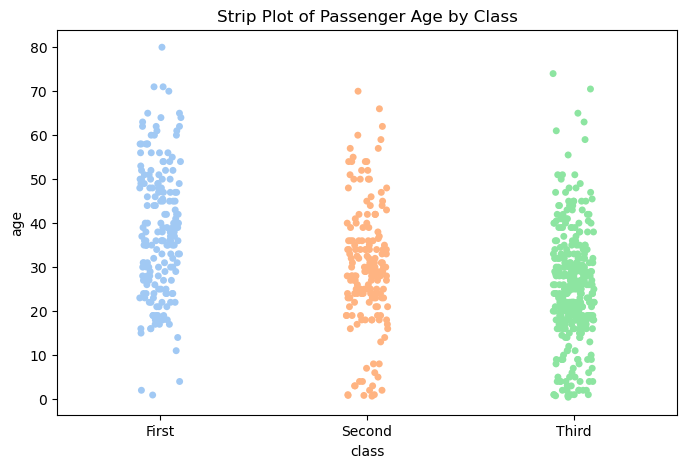

In [23]:
# Sets the current figure size
plt.figure(figsize=(8, 5))

# See: https://seaborn.pydata.org/generated/seaborn.stripplot.html
sns.stripplot(
    data=titanic,  # Specifies the titanic dataset as the data source
    x="class",  # Uses the class column as the categorical x-axis
    y="age",  # Uses the age column as the numerical y-axis
    jitter=True,  # Adds random noise (small shifts) to the x-axis positions, making it easier to see individual points
    hue="class",  #  Colors the points based on the passenger class, helping differentiate groups
    palette="pastel",  # Sets the color palette
)

# Adds a descriptive title
plt.title("Strip Plot of Passenger Age by Class")

# Shows the plot
plt.show()

### Swarm Plot
A **swarm plot** is a categorical scatter plot similar to a strip plot, but instead of allowing points to overlap, it adjusts their positions to prevent overlap while maintaining their categorical alignment. This ensures that all individual data points remain visible, making it a great choice when you want to see the distribution of observations without excessive clutter.

In this example, we use a **swarm plot** to visualize the age distribution of Titanic passengers across different travel classes. The `hue` parameter is used to color-code each class, making it easier to compare groups.

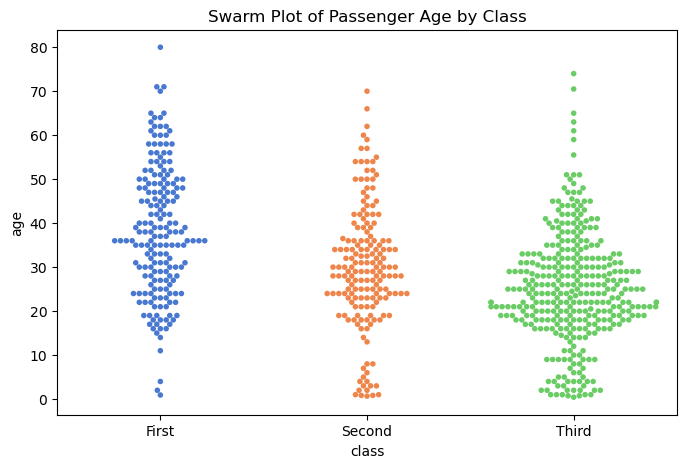

In [24]:
# Sets the current figure size
plt.figure(figsize=(8, 5))

# See: https://seaborn.pydata.org/generated/seaborn.swarmplot.html
# Notice that you can adjust the size of the points too
sns.swarmplot(
    data=titanic,  # Specifies the titanic dataset as the data source 
    x="class",  # Uses the class column as the categorical x-axis 
    y="age",  # Uses the age column as the numerical y-axis
    hue="class",  # Colors the points based on the class
    palette="muted",  # Applies a muted color palette for a softer look
    size=4,  # Adjusts the size of the points for better readability
)

# Adds a descriptive title
plt.title("Swarm Plot of Passenger Age by Class")

# Shows the plot
plt.show()

## Box Plot and Violin Plot
### Box Plot
A **box plot** (also called a box-and-whisker plot) is a statistical visualization that summarizes the **distribution** of numerical data for each category. It provides insights into key statistical properties, such as:

- **Median (Q2)**: The middle value of the dataset.

- **Interquartile Range (IQR)**: The range between the first quartile (Q1, 25th percentile) and third quartile (Q3, 75th percentile), representing the middle 50% of the data.

- **Whiskers**: Extend to the smallest and largest values within 1.5 times the IQR from Q1 and Q3.

- **Outliers**: Individual points beyond the whiskers, representing extreme values.

In this example, we use a **box plot** to analyze the age distribution of passengers in different travel classes on the Titanic. The `hue `parameter allows us to **color-code** each class, making comparisons more visually intuitive.

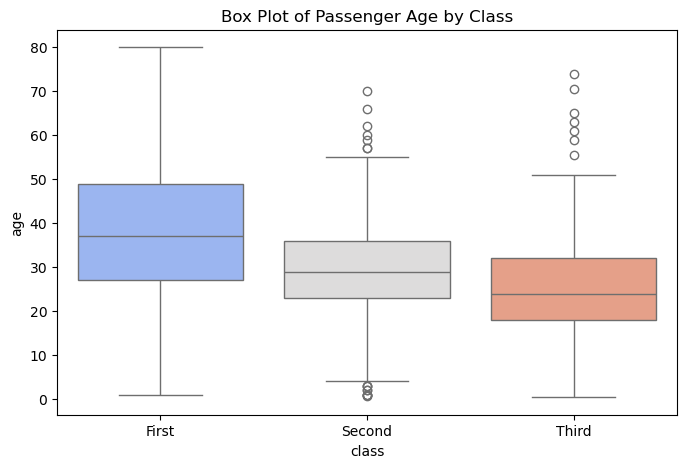

In [25]:
# Sets the current figure size
plt.figure(figsize=(8, 5))

# See: https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(
    data=titanic,  # Specifies the titanic dataset as the data source 
    x="class",  # Uses the class column as the categorical x-axis  
    y="age",  # Uses the age column as the numerical y-axis 
    hue="class",  # Colors the boxes based on the class 
    palette="coolwarm",  # Applies the coolwarm color scheme for contrast
)

# Adds a descriptive title
plt.title("Box Plot of Passenger Age by Class")

# Shows the plot
plt.show()

### Violin Plot
A **violin plot** is a combination of a **box plot** and a **kernel density estimate (KDE) plot**. It provides more insight into the **distribution** of data by showing:

- The **median** (like a box plot).

- The **interquartile range (IQR)**, which represents the middle 50% of the data.

- The **density shape**, which indicates how the data is distributed (wider sections mean more data points, while narrower sections indicate fewer data points).

This makes violin plots especially useful for comparing distributions across multiple categories.

In this example, we use a **violin plot** to visualize the distribution of **passenger ages** across different **travel classes** in the Titanic dataset. The `hue` parameter is used to **color-code** each class for easy comparison.

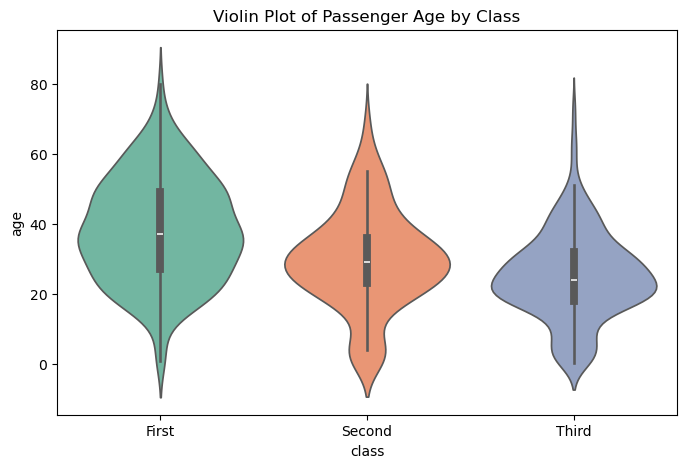

In [26]:
# Sets the current figure size
plt.figure(figsize=(8, 5))

# See: https://seaborn.pydata.org/generated/seaborn.violinplot.html
sns.violinplot(
    data=titanic,  # Specifies the titanic dataset as the data source  
    x="class",  # Uses the class column as the categorical x-axis   
    y="age",  # Uses the age column as the numerical y-axis 
    hue="class",  # Colors the violins based on the class  
    palette="Set2",  # Applies the Set2 color palette for differentiation
)

# Adds a descriptive title
plt.title("Violin Plot of Passenger Age by Class")

# Shows the plot
plt.show()

## Bar Plot and Count Plot
### Bar Plot
A **bar plot** is used to visualize the **mean** (or other summary statistics) of a numerical variable for each category. It is a great way to compare the average value of a numerical feature across different groups. In addition to showing the mean, **confidence intervals** are often included to represent the uncertainty or variability around the mean estimate.

In this example, the **bar plot** visualizes the **average fare** paid by passengers in different **classes** aboard the Titanic. The `hue` parameter allows us to color-code the bars based on the **class**, and the confidence intervals help us understand how reliable the calculated averages are.

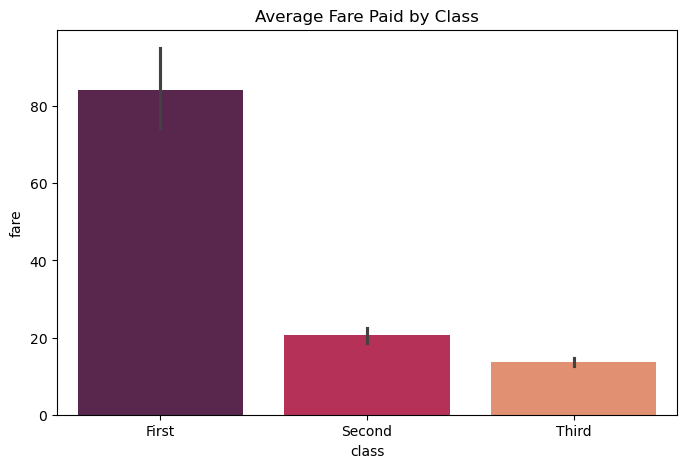

In [27]:
# Sets the current figure size
plt.figure(figsize=(8, 5))

# See: https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(
    data=titanic,  # Specifies the titanic dataset as the data source   
    x="class",  # Uses the class column as the categorical x-axis   
    y="fare",  # Uses the fare column (the numerical variable whose mean we want to display) as the numerical y-axis
    hue="class",  # Colors the bars based on the class
    palette="rocket",  # Applies the rocket color palette, providing a visually distinct gradient of colors for the different classes
)

# Adds a descriptive title
plt.title("Average Fare Paid by Class")

# Shows the plot
plt.show()

### Count Plot
A **count plot** is used to visualize the frequency (or count) of different categories in a categorical variable. It is helpful when you want to compare the number of observations in each category. Each bar in a count plot represents the total number of occurrences of a specific category.

In this example, a **count plot** is used to show the distribution of **passenger classes** aboard the Titanic. The `hue` parameter further breaks down the count by class, helping to highlight any variations between the classes.

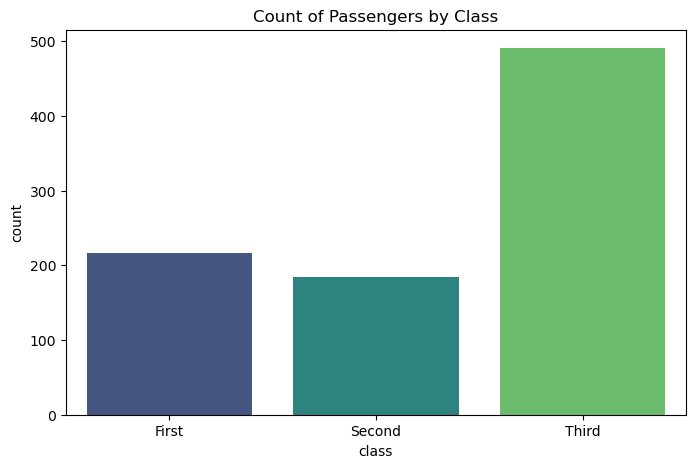

In [28]:
# Sets the current figure size
plt.figure(figsize=(8, 5))

# See: https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.countplot(
    data=titanic,  # Specifies the titanic dataset as the data source   
    x="class",  # Uses the class column as the categorical x-axis
    hue="class",  # Colors the bars based on the class
    palette="viridis",  # Applies the viridis color palette, providing a smooth gradient of colors for the categories
)

# Adds a descriptive title
plt.title("Count of Passengers by Class")

# Shows the plot
plt.show()

## Point Plot
A **point plot** is useful for visualizing trends in categorical data, especially when you want to compare the values of a numerical variable across different categories. It’s similar to a **line plot**, but instead of connecting the points with lines, the points are displayed individually, making it easier to identify trends and relationships. 

Point plots are great when you have categorical data on the x-axis and a numerical value on the y-axis, with potential grouping (or splitting) based on other categorical variables.

In this example, a **point plot** is used to visualize the **survival rate** of passengers aboard the Titanic, broken down by both **class** and **gender**. The points show the survival rate for each class, with different colors representing the gender of the passengers.

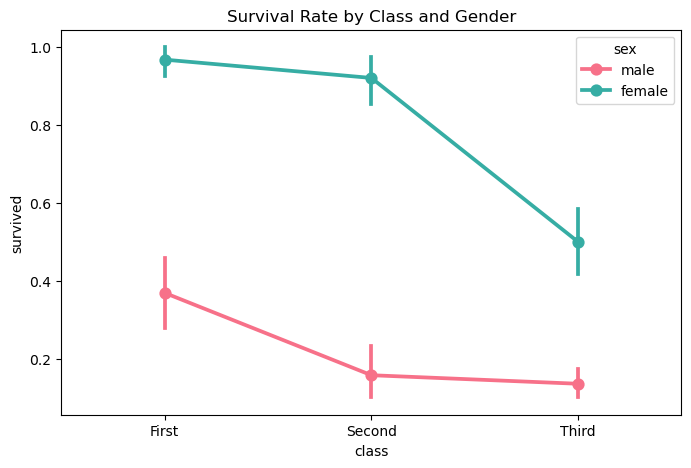

In [29]:
# Sets the current figure size
plt.figure(figsize=(8, 5))

# See: https://seaborn.pydata.org/generated/seaborn.pointplot.html
sns.pointplot(
    data=titanic,  # Specifies the titanic dataset as the data source    
    x="class",  # Uses the class column as the categorical x-axis
    y="survived",  # Defines the y-axis as the survival status (0 or 1) of the passengers
    hue="sex",  # Colors the points based on the sex of the passengers (male or female)
    palette="husl",  # Applies the husl color palette, providing a visually distinct coloring scheme for different genders
)

# Adds a descriptive title
plt.title("Survival Rate by Class and Gender")

# Shows the plot
plt.show()

## 3.1 Quick Challenge
Now that we’ve explored different categorical plots, try this challenge. **Modify the visualization below by:**

1. Changing the plot type from a **box plot** to a **violin plot**.

2. Using `"deep"` as the color palette.

3. Adding `hue="sex"` to compare male and female passengers.

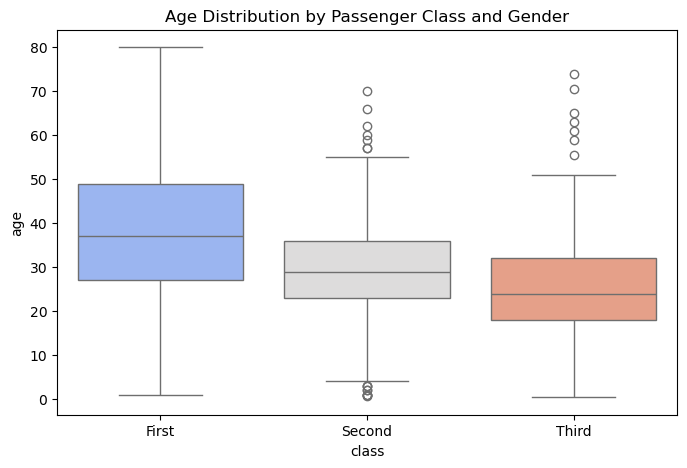

In [30]:
# Sets the current figure size
plt.figure(figsize=(8, 5))

# TODO: Replace with the correct categorical plot and parameters
sns.boxplot(  # TODO: # Modify this line
    data=titanic,  # Specifies the titanic dataset as the data source    
    x="class",  # Uses the class column as the categorical x-axis
    y="age",  # Uses the age column as the numerical y-axis
    hue="class",  # TODO: # Modify this line
    palette="coolwarm",  # TODO: # Modify this line
)  

# Adds a descriptive title
plt.title("Age Distribution by Passenger Class and Gender")

# Shows the plot
plt.show()

💡 **Bonus:** Try using a **swarm plot** combined with a **box plot** using the `dodge=True` parameter!